In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

%matplotlib inline

In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-563a1c91-40ed-4556-bbe7-0e1328453437',
    'IBM_API_KEY_ID': 'oqglYgpciJdM7HrcoaDfb86whTUtJW38kg6WQuCBI_DW',
    'ENDPOINT': 'https://s3.ap-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'titanicdatarefineryampautoai-donotdelete-pr-xsqfuzgdbrjtti',
    'FILE': 'titanic.csv'
}


In [3]:
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1np4Rqtkc1FnXvYKNFIHK6mdfjIHYbElL' -O titanic.csv
df_titanic=pd.read_csv('titanic.csv')
df_titanic.head()

--2021-04-05 12:43:33--  https://docs.google.com/uc?export=download&id=1np4Rqtkc1FnXvYKNFIHK6mdfjIHYbElL
Resolving docs.google.com (docs.google.com)... 172.217.31.174, 2404:6800:4004:808::200e
Connecting to docs.google.com (docs.google.com)|172.217.31.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5lhcutild0u5gnuao1vpl1i5n297gn08/1617626550000/04591858293269658552/*/1np4Rqtkc1FnXvYKNFIHK6mdfjIHYbElL?e=download [following]
--2021-04-05 12:43:34--  https://doc-00-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5lhcutild0u5gnuao1vpl1i5n297gn08/1617626550000/04591858293269658552/*/1np4Rqtkc1FnXvYKNFIHK6mdfjIHYbElL?e=download
Resolving doc-00-1s-docs.googleusercontent.com (doc-00-1s-docs.googleusercontent.com)... 172.217.25.97, 2404:6800:4004:81c::2001
Connecting to doc-00-1s-docs.googleusercontent.com (doc-00-1s-docs.google

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df_titanic.info()
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


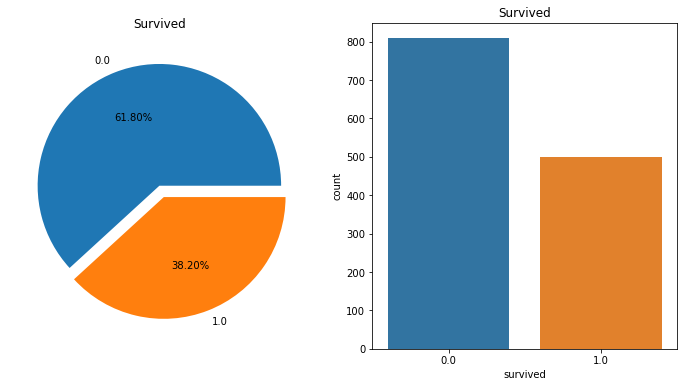

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,6))

df_titanic['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=df_titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
df_titanic['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

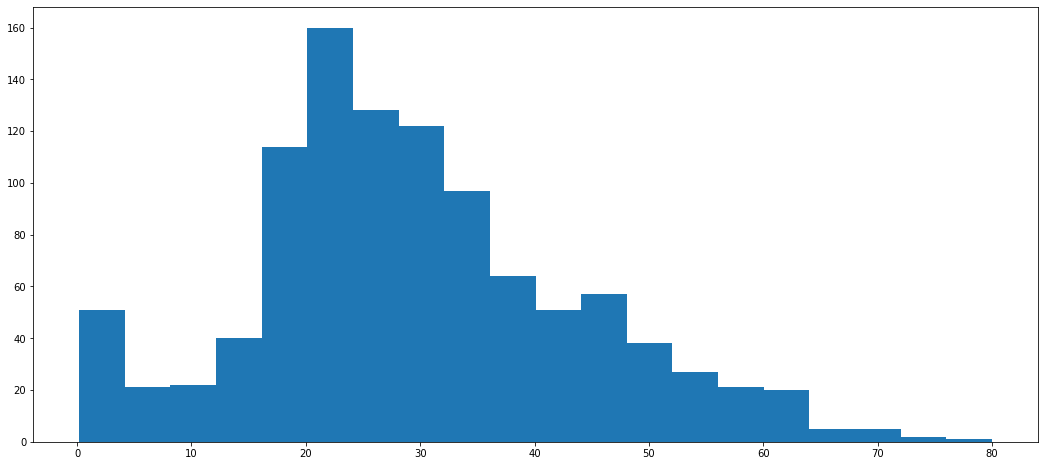

In [7]:
df_titanic['age'].hist(bins=20,figsize=(18,8),grid=False);

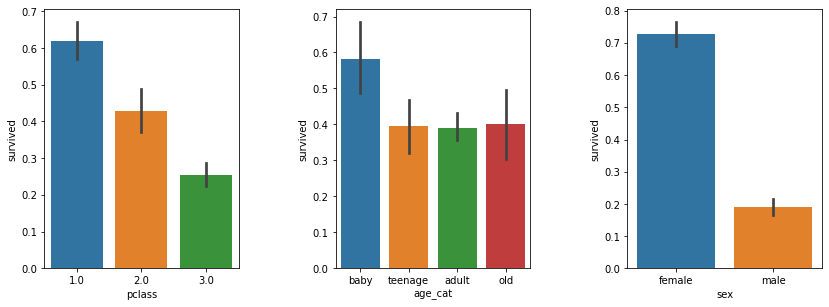

In [8]:
df_titanic['age_cat'] = pd.cut(df_titanic['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=df_titanic)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=df_titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data=df_titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

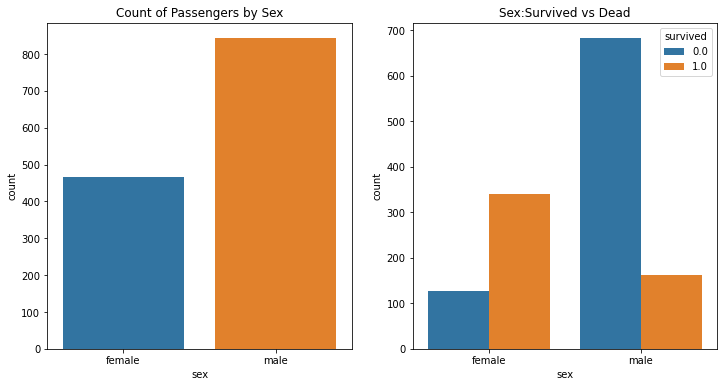

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=df_titanic, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df_titanic, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [10]:
df_titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
age_cat       264
dtype: int64

In [11]:
# null이 실제로 몇 번 row에 있는지 확인한다
print("Rows where fare value is missing:")
df_titanic[df_titanic['fare'].isnull()]

Rows where fare value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN,old
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print("Rows where age value is missing:")
df_titanic[df_titanic['age'].isnull()]

Rows where age value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",NaN
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA",NaN
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",NaN
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN


In [13]:
# 중요! - 데이터 정제2 - 컬럼값이 NULL이 아닌 것만 필터링
df_titanic = df_titanic[df_titanic['age'].notna()]
df_titanic = df_titanic[df_titanic['fare'].notna()]
df_titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       2
boat         628
body         926
home.dest    360
age_cat        0
dtype: int64

In [14]:
print("Rows where fare value is missing:")
df_titanic[df_titanic['fare'].isnull()]

Rows where fare value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat


In [15]:
print("Rows where age value is missing:")
df_titanic[df_titanic['age'].isnull()]

Rows where age value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat


In [16]:
df_titanic.sex.dtype

dtype('O')

In [17]:
# sex를 문자열에서 정수로 변경하는 함수를 정의. LabelEncoder.fit()은 알파벳의 순서로 sort해서 encoding한다
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["sex"]=le.transform(data["sex"]) 
    return data

In [18]:
# sex를 문자열에서 정수로 변경하는 함수를 정의
#df_titanic = sex_to_int(df_titanic)
#df_titanic.sex.dtype

In [19]:
x_data = df_titanic.values[:, [0,3,4,5,6,8]]
y_data = df_titanic.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [20]:
x_data

array([[1.0, 'female', 29.0, 0.0, 0.0, 211.3375],
       [1.0, 'male', 0.9167, 1.0, 2.0, 151.55],
       [1.0, 'female', 2.0, 1.0, 2.0, 151.55],
       ...,
       [3.0, 'male', 26.5, 0.0, 0.0, 7.225],
       [3.0, 'male', 27.0, 0.0, 0.0, 7.225],
       [3.0, 'male', 29.0, 0.0, 0.0, 7.875]], dtype=object)

In [21]:
y_data

array([[1.0],
       [1.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [22]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

ModuleNotFoundError: No module named 'keras'

In [ ]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [ ]:
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

In [ ]:
model.predict(dicaprio)

In [ ]:
model.predict(winslet)